In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set up Data

In [2]:
#Load covid-19 data from European Centre for Disease Prevention and Control website
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-22.xlsx'
df = pd.read_excel(url)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-18,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
12386,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12387,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
12388,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12389,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


# Covid-19 Analysis by Continents

In [3]:
df_continents = df.groupby(['continentExp'])['cases','deaths'].agg('sum')
df_continents

,cases,deaths
continentExp,,
Africa,24617,1189
America,979282,52686
Asia,406236,15356
Europe,1101681,107453
Oceania,8010,95
Other,696,7


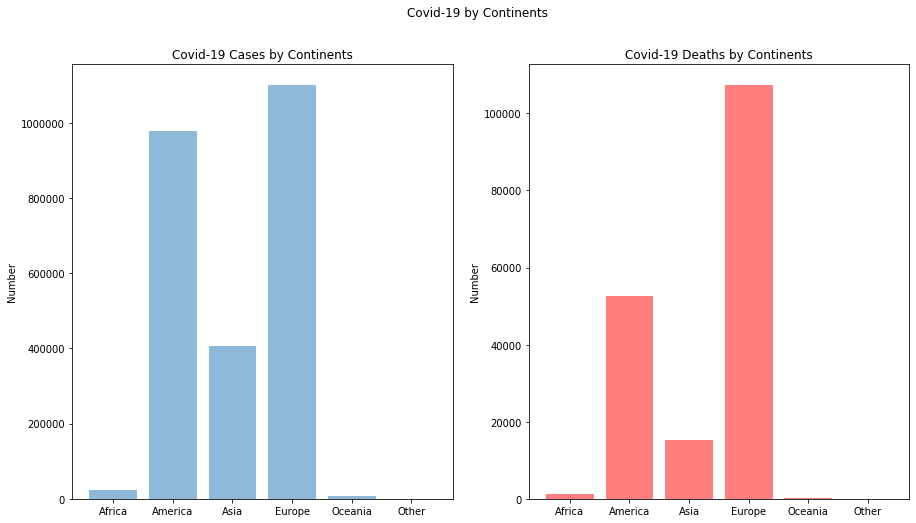

In [4]:
# Create figure and plot space
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig1.suptitle('Covid-19 by Continents')

plt.subplot(1, 2, 1)
plt.bar(np.arange(len(df_continents['cases'])), df_continents['cases'], align='center', alpha=0.5)
plt.xticks(range(len(df_continents.index)), df_continents.index)
plt.ylabel('Number')
plt.title('Covid-19 Cases by Continents')

plt.subplot(1, 2, 2)
plt.bar(np.arange(len(df_continents['deaths'])), df_continents['deaths'], align='center', alpha=0.5, color = 'red')
plt.xticks(range(len(df_continents.index)), df_continents.index)
plt.ylabel('Number')
plt.title('Covid-19 Deaths by Continents')

plt.show()

## Draw Pie Chart

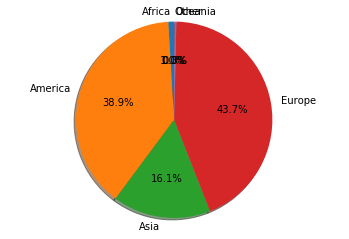

In [5]:
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice

fig3, ax5 = plt.subplots()
ax5.pie(df_continents['cases'], explode=explode, labels=df_continents.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Covid-19 Analysis by Countries

In [6]:
df_countries = df.groupby(['countriesAndTerritories'])['cases','deaths'].agg('sum')
df_countries_top10 = df_countries.sort_values(by=['cases'], ascending = False).head(10)
df_countries_top10

,cases,deaths
countriesAndTerritories,,
United_States_of_America,825041,45063
Spain,204178,21282
Italy,183957,24648
Germany,145694,4879
United_Kingdom,129044,17337
France,117324,20796
Turkey,95591,2259
Iran,84802,5297
China,83864,4636


In [7]:
df_population = df.groupby(['countriesAndTerritories'])['countriesAndTerritories','popData2018'].agg('mean')
pd.DataFrame(df_population)

,popData2018
countriesAndTerritories,
Afghanistan,37172386.0
Albania,2866376.0
Algeria,42228429.0
Andorra,77006.0
Angola,30809762.0
...,...
Venezuela,28870195.0
Vietnam,95540395.0
Yemen,28498687.0


In [8]:
mergedDf = df_countries.merge(df_population, left_index=True, right_index=True)
mergedDf.loc['Turkey']

cases             95591.0
deaths             2259.0
popData2018    82319724.0
Name: Turkey, dtype: float64

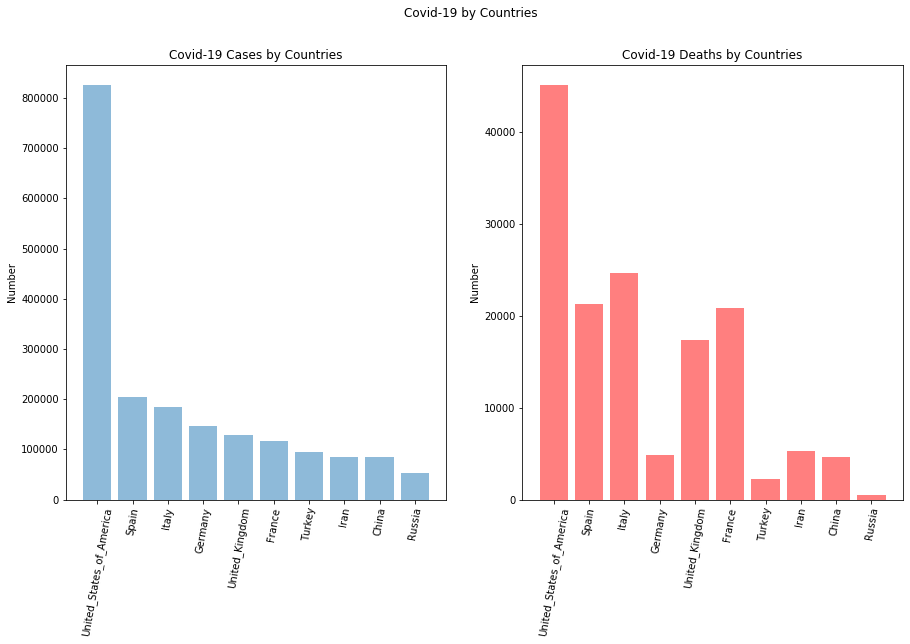

In [9]:
# Create figure and plot space
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,8))
fig2.suptitle('Covid-19 by Countries')

plt.subplot(1, 2, 1)
plt.bar(np.arange(len(df_countries_top10['cases'])), df_countries_top10['cases'], align='center', alpha=0.5)
plt.xticks(range(len(df_countries_top10.index)), df_countries_top10.index)
degrees = 80
plt.xticks(rotation=degrees)
plt.ylabel('Number')
plt.title('Covid-19 Cases by Countries')

plt.subplot(1, 2, 2)
plt.bar(np.arange(len(df_countries_top10['deaths'])), df_countries_top10['deaths'], align='center', alpha=0.5, color = 'red')
plt.xticks(range(len(df_countries_top10.index)), df_countries_top10.index)
plt.xticks(rotation=degrees)
plt.ylabel('Number')
plt.title('Covid-19 Deaths by Countries')

plt.show()

# Total confirmed COVID-19 deaths per million people

In [10]:
df_count_per_capita = df.groupby(['countriesAndTerritories'])['cases','deaths'].agg('sum')


## Turkey's Data

In [11]:
#Turkey's Data Frame
df_turkey = df[df['countriesAndTerritories'] == 'Turkey']
df_turkey.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
11541,2020-04-22,22,4,2020,4611,119,Turkey,TR,TUR,82319724.0,Asia
11542,2020-04-21,21,4,2020,4674,123,Turkey,TR,TUR,82319724.0,Asia
11543,2020-04-20,20,4,2020,3977,127,Turkey,TR,TUR,82319724.0,Asia
11544,2020-04-19,19,4,2020,3783,121,Turkey,TR,TUR,82319724.0,Asia
11545,2020-04-18,18,4,2020,4353,126,Turkey,TR,TUR,82319724.0,Asia


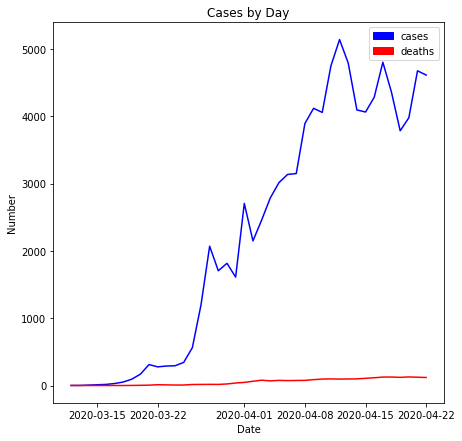

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(7, 7))

# Add x-axis and y-axis
ax.plot(df_turkey['dateRep'],
        df_turkey['cases'],
        color='blue', label='cases')

ax.plot(df_turkey['dateRep'],
        df_turkey['deaths'],
        color='red', label='deaths')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number",
       title="Cases by Day")

# Create another legend for the second line.

red_patch = mpatches.Patch(color='red', label='deaths', linestyle='solid')
blue_patch = mpatches.Patch(color='blue', label='cases', linestyle='solid')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

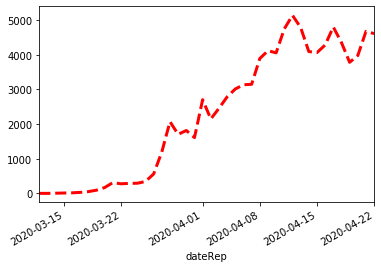

In [13]:
timeseries = pd.Series(list(pd.to_numeric(df_turkey['cases'], downcast='float')), index=df_turkey['dateRep'])
timeseries.plot(color='red', linestyle='dashed', linewidth=3, markersize=12)

## Germany's Data Frame

In [14]:
#Germany's Data Frame
df_turkey = df[df['countriesAndTerritories'] == 'Germany']
df_turkey.groupby(['year','month'])['cases','deaths'].agg('sum')

cases  deaths
year month               
2019 12         0       0
2020 1          5       0
     2         52       0
     3      61856     583
     4      83781    4296